# Analisis de Datos Etapa 1

* 1. estadisticas por Zona, visualización de graficas por Zona
* * 1.1 Seleccionar Datas de Interes
* * 1.2 Estadisticas y visualizaciones por zona
* * * 1.2.1 Estadisticas general por zona
* * * 1.2.2 Visualizacion general por zona
* * * 1.2.3 Estadisticas clase quemado por zona
* * * 1.2.3 Visualizacion clase quemado por zona
* * * 1.2.3 Estadisticas clase No quemado por zona
* * * 1.2.3 Visualizacion clase No quemado por zona
* 2. Visualización de estadisticas de archivos generico
* 3. filtrado de achivo por clases para datos perteneciente al 50% más representativo
* 4. creación de set de datos optimizado con todos los data Set
* 5. rentrenamiento y visualización de resultados obtenidos con estadisticas de data set

## Cargar librerias

In [1]:
# -*- coding: utf-8 -*-
import os,sys

#consegir direccion base de experimentos
base = os.getcwd().strip(' ').split('/')
dirBase=''
for i in range(len(base)-1):
    dirBase+=base[i]+'/'
    
sys.path.append(dirBase+'Funciones')
print('La direccion base es: '+dirBase)

import indices as ind
import imagenes as im
import toolbox as tl
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
from time import time
import pandas as pd
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
import numpy as np


La direccion base es: /home/pc/Tesis MCC/


## Direcciones de carpetas y archivos

In [2]:
#Direccion general

dirImAnalisis= dirBase+'imagenesAnalisis/'

modelBase=dirBase+'modelos/base/modelo_ELM_delRasInd.sav'  #modelo base entrenado con zonas visuales
#nombre de imagen según modelo
rasClassModel='dIm+dInd.tif'
rasClasificado='rasterClasificado.tif'
shpClasificado='shpClasificado.shp'
csvClasificado='CsvClasificado.csv'

#1. clasificar con modelo entrenado imagenes
#zonas de experimento, se encuentra dentro de la carpete de imagenes a analizar
#zonas=['maule','concepcion','temuco']
zonas=['maule']

# 1. Estadisticas individuales y visualización de graficas

## 1.1 Seleccionar Datas de Interes

*  Listar todos los arvhivos CSV
*  Selecionar principales.
*  abrir archivos para estadisticas

In [3]:
print('Mostrar CSV de experimentos de cada Zona')
inicio=time() #captura tiempos de ejecución

contador=0 #control ingreso unico a zona
for zona in zonas: #todas las zonas
    dirZona=dirImAnalisis+zona+'/procesadas/'
    print(dirZona)
    
    
    archivosCSV=os.listdir(dirZona)
    archivosCSV=tl.conservarListaPexten(archivosCSV,".csv")
    
    print('En la Zona: ',zona)
    for arc in archivosCSV:
        print(' * ',arc)
    print('')
    

    
    

Mostrar CSV de experimentos de cada Zona
/home/pc/Tesis MCC/imagenesAnalisis/maule/procesadas/
En la Zona:  maule
 *  pre+indCsvClasificado.csv
 *  indicesPostCsvClasificado.csv
 *  dIm+dIndCsvClasificado.csv
 *  indicesPreCsvClasificado.csv
 *  deltasCsvClasificado.csv
 *  deltasIndCsvClasificado.csv
 *  post+indCsvClasificado.csv



# Los archivos a analizar son:
### Seleccion manual de SET DE DATOS a analizar
    * deltasCsvClasificado.csv
    * deltasIndCsvClasificado.csv
    * dIm+dIndCsvClasificado.csv

In [4]:
SDSeleccionado=[]
SDSeleccionado.append('deltasCsvClasificado.csv')
#SDSeleccionado.append('deltasIndCsvClasificado.csv')
#SDSeleccionado.append('dIm+dIndCsvClasificado.csv')

#print(zonasSeleccionado)

## 1.2 Estadisticas y visualizaciones por zona

* 1.2.1 Estadisticas general por zona y DataSet
* 1.2.2 Visualizacion general por zona y DataSet
* 1.2.3 Estadisticas clase quemado por zona y DataSet
* 1.2.3 Visualizacion clase quemado por zona y DataSet
* 1.2.3 Estadisticas clase No quemado por zona y DataSet
* 1.2.3 Visualizacion clase No quemado por zona y DataSet

In [5]:
# Aseguremonos de que las imágenes aparezcan insertadas en iPython Notebook
%matplotlib inline

### 1.2.1 Estadisticas general por zona y DataSet

Por cada zona y 
* Cabecera
* Estadistica general
* número de datos por clase
* correlaciones
* Indice de separabilidad por clases
* Analisis de componentes principales


In [6]:
inicio=time() #captura tiempos de ejecución
contador=0 #control ingreso unico a zona
for zona in zonas: #todas las zonas
    print('\n\n***********************************************************************************')
    print('***********************************************************************************')
    print('Estadisticas para Zona: ',zona)
    dirZona=dirImAnalisis+zona+'/procesadas/'
    for SDS in SDSeleccionado:
        archivosCSV=dirZona+SDS
        ds=pd.read_csv(archivosCSV,sep=';')
        print('***********************************************************************************')
        print('Estadisticas para generales data set:',SDS)
        print('\n1. Cabezera:')
        print(ds.head())
        
        print('\n2. Estadisticas Principales:')
        print(ds.describe())
                        
        grupoClase=ds.groupby(['Clase'])
        print('\n3. Agrupado por clase')
        print(grupoClase.banda1.count()) #se utiliza cualquier banda
        
        print('\n4. Correlación entre bandas')
        correlacionBandas=ds.corr()
        print(correlacionBandas)
        
        '''
        print('\n5. Indice de separabilidad')
        quemado=ds[ds['Clase']==1]
        noQuemado=ds[ds['Clase']==0]
        print(quemado.head())
        print(noQuemado.head())
        
        '''
        

        
        



***********************************************************************************
***********************************************************************************
Estadisticas para Zona:  maule
***********************************************************************************
Estadisticas para generales data set: deltasCsvClasificado.csv

1. Cabezera:
   banda1  banda2  banda3  banda4  banda5  banda6  banda7  banda8  banda9  \
0    90.0    51.0    50.0    -8.0   143.0   215.0   195.0   164.0   110.0   
1   100.0   110.0    80.0    44.0   167.0   127.0   311.0   219.0   112.0   
2   138.0   144.0   161.0   124.0   233.0   189.0   291.0   335.0   224.0   
3   116.0   100.0   107.0    86.0   100.0   194.0   272.0   308.0   190.0   
4    92.0    62.0    29.0     6.0   177.0   180.0   365.0   213.0   141.0   

   Clase  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

2. Estadisticas Principales:
             banda1        banda2        banda3        banda4        banda5  \


# Graficas



***********************************************************************************
***********************************************************************************
Graficas para Zona:  maule
***********************************************************************************
Graficas generales data set: deltasCsvClasificado.csv

1. Histograma Clases:


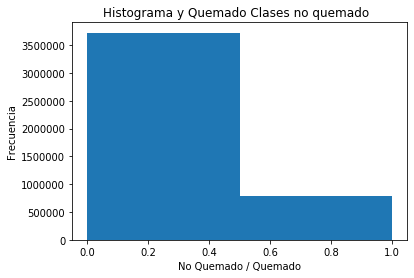


2. Promedio por bandas Quemado y no Quemado:


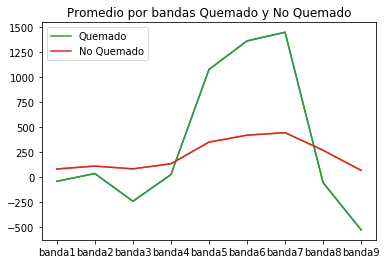


3. Promedio por bandas Quemado:


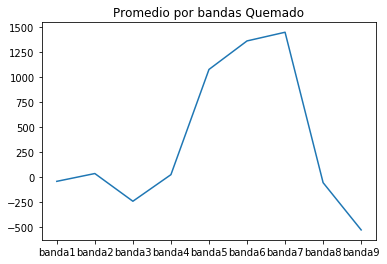


4. BoxPlot bandas Quemado:  


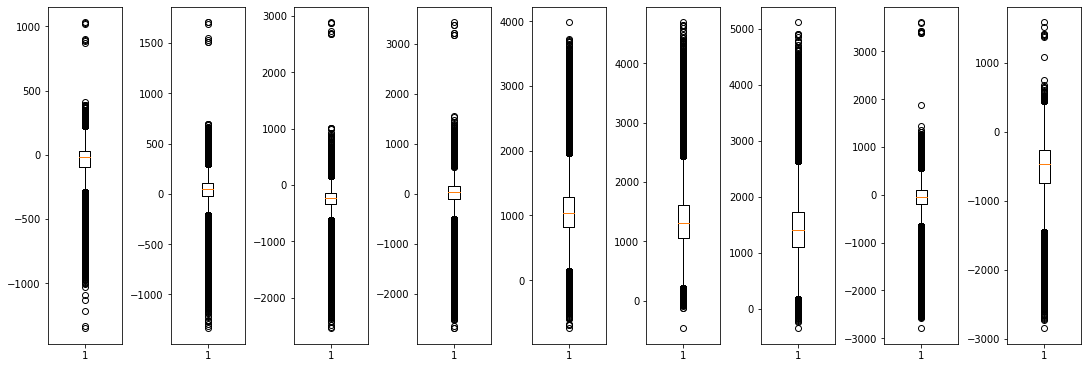


5. Promedio de bandas no quemado


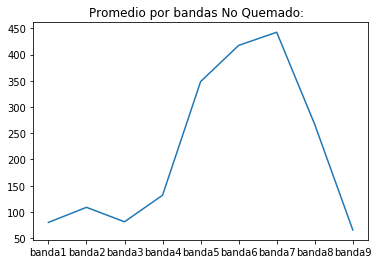


6. BoxPlot bandas No Quemado:  


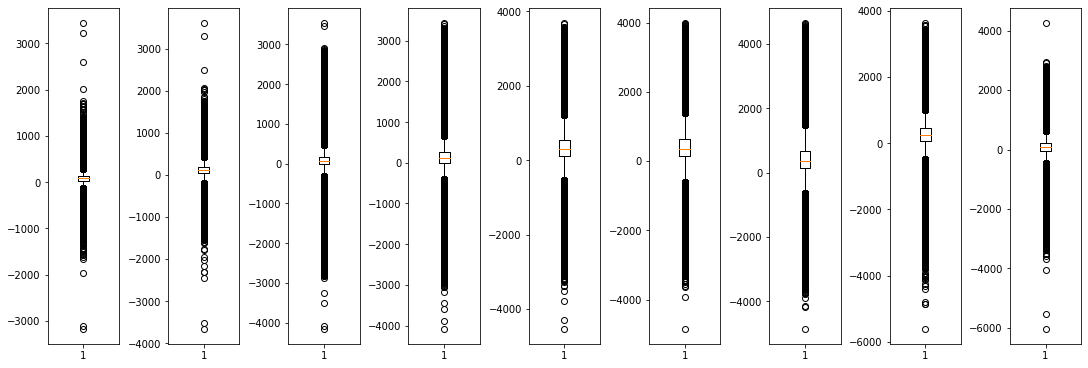


7. Correlación entre bandas quemadas
Bandas:  Index(['banda1', 'banda2', 'banda3', 'banda4', 'banda5', 'banda6', 'banda7',
       'banda8', 'banda9'],
      dtype='object')


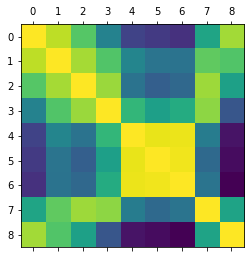


8. Correlación entre bandas No quemadas
Bandas:  Index(['banda1', 'banda2', 'banda3', 'banda4', 'banda5', 'banda6', 'banda7',
       'banda8', 'banda9'],
      dtype='object')


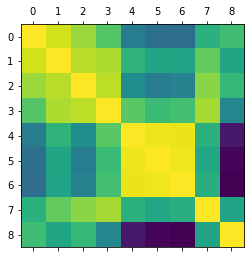

In [34]:
%matplotlib inline
inicio=time() #captura tiempos de ejecución
contador=0 #control ingreso unico a zona
for zona in zonas: #todas las zonas
    print('\n\n***********************************************************************************')
    print('***********************************************************************************')
    print('Graficas para Zona: ',zona)
    dirZona=dirImAnalisis+zona+'/procesadas/'
    for SDS in SDSeleccionado:
        archivosCSV=dirZona+SDS
        ds=pd.read_csv(archivosCSV,sep=';')
        print('***********************************************************************************')
        print('Graficas generales data set:',SDS)
        
        print('\n1. Histograma Clases:')
        plt.hist(ds['Clase'], bins=2)
        plt.xlabel("No Quemado / Quemado")
        plt.ylabel("Frecuencia")
        plt.title("Histograma y Quemado Clases no quemado  ")
        plt.show()
        
        quemado=ds[ds['Clase']==1]
        quemado=quemado.drop('Clase', axis=1)
        noQuemado=ds[ds['Clase']==0]
        noQuemado=noQuemado.drop('Clase', axis=1)
        medQuemado=quemado.mean()
        medNoQuemado=noQuemado.mean()
        
        print('\n2. Promedio por bandas Quemado y no Quemado:')
        plt.plot(medQuemado)
        plt.plot(medNoQuemado)
        plt.title("Promedio por bandas Quemado y No Quemado")
        
        plt.plot(medQuemado, label = "Quemado")
        plt.plot(medNoQuemado, label = "No Quemado")
        plt.legend()        
        plt.show()
        plt.ion() #modo activo de dibujo

        
        
        
        print('\n3. Promedio por bandas Quemado:')
        plt.plot(medQuemado)
        plt.title("Promedio por bandas Quemado")
        plt.show()
        import matplotlib.gridspec as gridspec
        print("\n4. BoxPlot bandas Quemado:  ")
        
        fig2 = plt.figure(figsize=(15, 5),constrained_layout=True)
        spec2 = gridspec.GridSpec(ncols=len(quemado.columns), nrows=1, figure=fig2)      
        for i in range(len(quemado.columns)):
            fig2.add_subplot(spec2[0, i])
            plt.boxplot(quemado.iloc[:,i])
        plt.show()
                        
        print('\n5. Promedio de bandas no quemado')
        plt.plot(medNoQuemado)
        plt.title("Promedio por bandas No Quemado:  ")
        plt.show()
        
        print("\n6. BoxPlot bandas No Quemado:  ")
        fig2 = plt.figure(figsize=(15, 5),constrained_layout=True)
        spec2 = gridspec.GridSpec(ncols=len(noQuemado.columns), nrows=1, figure=fig2)      
        for i in range(len(noQuemado.columns)):
            fig2.add_subplot(spec2[0, i])
            plt.boxplot(noQuemado.iloc[:,i])
        plt.show()

        print('\n7. Correlación entre bandas quemadas')
        print('Bandas: ',quemado.columns)
        plt.matshow(quemado.corr())
        plt.show()
        
        print('\n8. Correlación entre bandas No quemadas')
        print('Bandas: ',noQuemado.columns)
        plt.matshow(noQuemado.corr())
        plt.show()

In [ ]:
print('prueba')

In [8]:
print(len(ds.columns))

10


In [17]:
quemado.iloc[:,1]

272         10.0
830        163.0
1016       163.0
1017        -1.0
1018       175.0
           ...  
4507359     -8.0
4507360     39.0
4507418     91.0
4507434    -39.0
4507435   -154.0
Name: banda2, Length: 785719, dtype: float64